In [1]:
import pandas
import numpy 
import yfinance
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint,adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#Data collection

In [12]:
start_date='2023-01-01'
end_date= '2023-12-22'

contracts = ['SONH24.CME','SONM24.CME','SONZ24.CME']   #mar24, jun24, dec24  
contracts_data = yfinance.download(contracts,start=start_date,end=end_date)["Close"]

contracts_data.head()

spread1 = contracts_data[contracts[0]] - contracts_data[contracts[1]]   #mar24-jun24
spread2 = contracts_data[contracts[1]] - contracts_data[contracts[2]]   #jun24-dec24
spreads = pandas.concat([spread1, spread2], axis=1, keys=['Spread1', 'Spread2'])  
fly = spreads['Spread1']-spreads['Spread2']   
spreads.head()

[*********************100%%**********************]  3 of 3 completed


,Spread1,Spread2
Date,,
2023-01-03,-0.175003,-0.235001
2023-01-04,-0.200005,-0.264999
2023-01-05,-0.189995,-0.270004
2023-01-06,-0.185005,-0.269997
2023-01-09,-0.189995,-0.275002


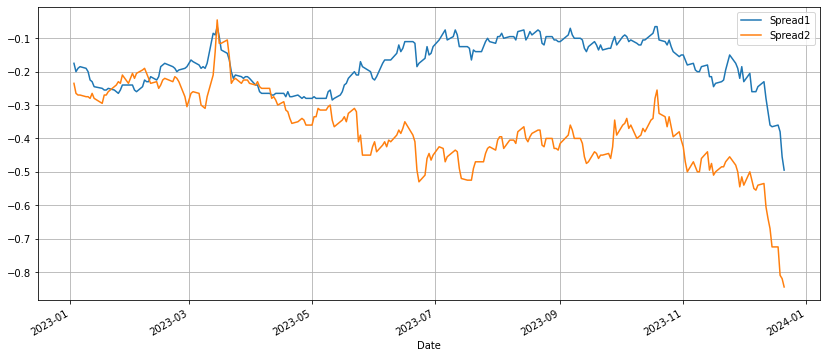

In [31]:
spreads.plot(figsize=(14,6),grid=True)
plt.show()

In [18]:
#calculating mean and standard deviation for mar-jun spread

mean = numpy.mean(spread1)
sd = numpy.std(spread1)

print("mean = ",mean, "\nstandard deviation = ",sd)

mean =  -0.18012253119021046 
standard deviation =  0.07367998661151702


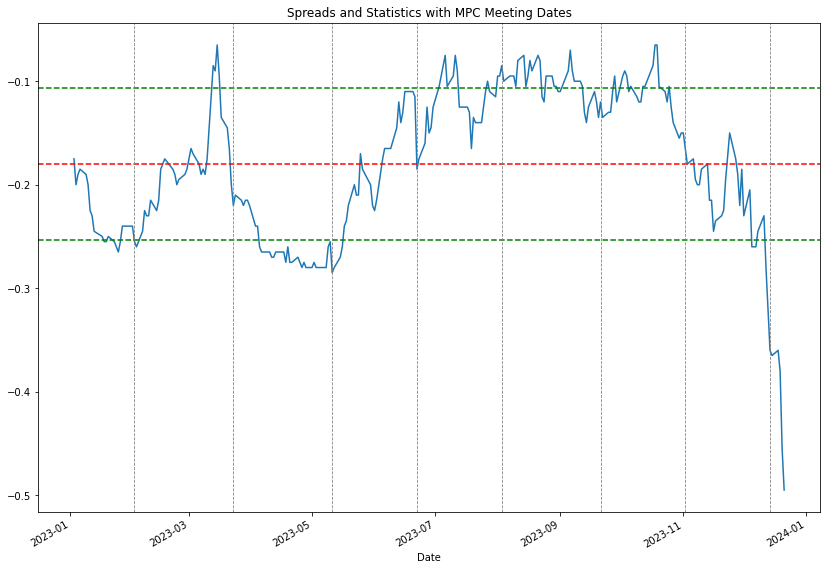

In [30]:
# Plot mean and standard deviation
plt.figure(figsize=(14,10))
spread1.plot(grid= False, label = "Mar24-Jun24")
plt.axhline(mean, color='r', linestyle='dashed', label='Mean Spread1')
plt.axhline(mean + sd, color='g', linestyle='dashed', label='Mean + 1 Std Dev Spread1')
plt.axhline(mean - sd, color='g', linestyle='dashed', label='Mean - 1 Std Dev Spread1')
plt.title('Spreads and Statistics with MPC Meeting Dates')
#also marking the MPC dates which has the most significant effect on the prices.
mpc_meeting_dates = ['2023-02-02', '2023-03-23', '2023-05-11', '2023-06-22',
                      '2023-08-03', '2023-09-21', '2023-11-02', '2023-12-14']
for date in mpc_meeting_dates:
    plt.axvline(date, color='gray', linestyle='dashed', linewidth=0.8)

In [39]:
#Calculating mean and standard deviation between each mpc meetings



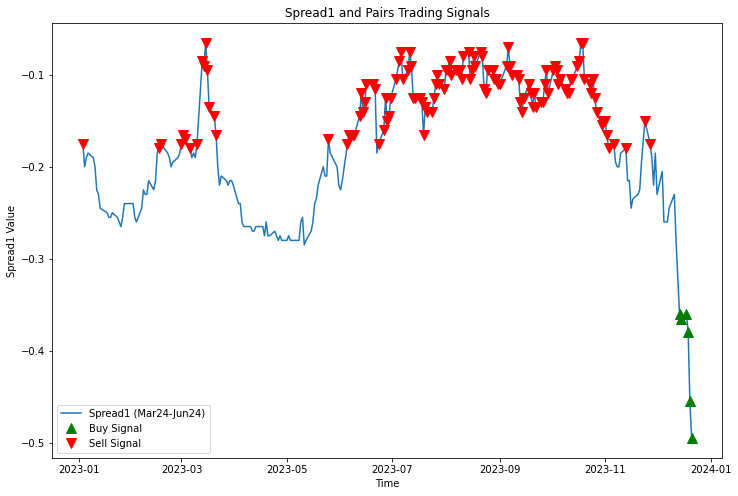

In [44]:
#building a strategy

#calculating z score

z_score = (spread1 - mean)/sd
entry_threshold = 2.0
exit_threshold = 0.0
signals = pandas.Series(index=spread1.index, data=0)  # Initialize signals (0 for no trade)

# Entry signal: Z-score below negative threshold
signals[z_score < -entry_threshold] = 1  # Buy (Long) signal

# Exit signal: Z-score crosses zero
signals[z_score > exit_threshold] = -1  # Sell (Short) signal

# Plot spread1 and trading signals
plt.figure(figsize=(12, 8))

# Plot spread1
plt.plot(spread1, label='Spread1 (Mar24-Jun24)')

# Plot entry and exit signals
plt.plot(spread1[signals == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(spread1[signals == -1], 'v', markersize=10, color='r', label='Sell Signal')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Spread1 Value')
plt.title('Spread1 and Pairs Trading Signals')
plt.legend()
plt.show()
